# Logistic regression to predict heart disease

Location:
https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression



## Import libraries

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import imblearn
from sklearn.metrics import *
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
%matplotlib inline

## read csv

In [48]:
heart = pd.read_csv('https://github.com/geoninja/Analytics/raw/master/data/framingham.csv')

In [49]:
profile = ProfileReport(heart, title = 'Heart disease',correlations = None, interactions = None, html = {'style':{'full_width' : True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##  Delete rows with null values

In [50]:
rows_before = len(heart)
heart.dropna(how='any', subset=['education','BPMeds','totChol','glucose','BMI','heartRate','cigsPerDay'],inplace=True)
rows_after = len(heart)
print(f'Rows Before: {rows_before}. Rows After: {rows_after}. Rows Deleted: {rows_before-rows_after}')

Rows Before: 4240. Rows After: 3658. Rows Deleted: 582


## Get dummies columns for 'education' variable

In [29]:
heart = pd.get_dummies(data=heart, drop_first=False,columns=['education'])

## Define Features and Target

In [30]:
target = ['TenYearCHD']
features = [x for x in heart.columns if x not in target]

## Normalize Data

In [31]:
heart_norm = heart.copy()

for i in ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']:    
    heart_norm[i] = (heart_norm[i] - heart_norm[i].mean()) / heart_norm[i].std()

## Correlation Matrix

<AxesSubplot: >

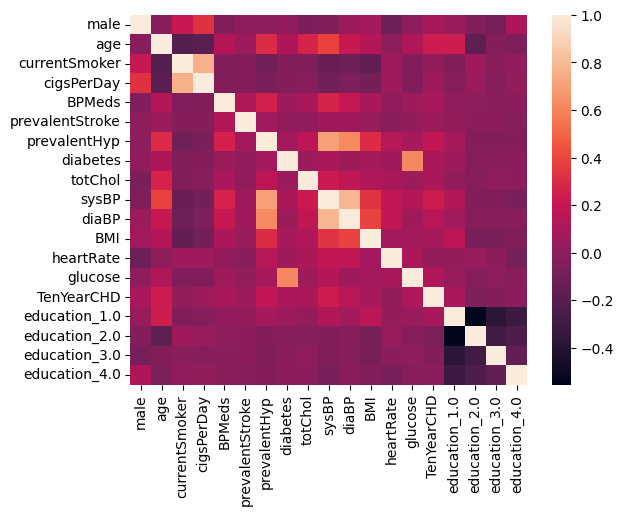

In [32]:
corr = heart_norm.corr()
sns.heatmap(corr)

## Specific check correlation with target

In [34]:
heart_norm.corrwith(heart_norm['TenYearCHD'])*100

male                 9.119898
age                 23.333055
currentSmoker        1.790904
cigsPerDay           5.267220
BPMeds               8.916235
prevalentStroke      4.835279
prevalentHyp        18.140848
diabetes             9.342200
totChol              9.001348
sysBP               22.294343
diaBP               15.057540
BMI                  8.449210
heartRate            2.084268
glucose             12.103275
TenYearCHD         100.000000
education_1.0        9.041528
education_2.0       -6.172675
education_3.0       -3.675715
education_4.0       -0.803575
dtype: float64

## Check for Multicollinearity

In [51]:
vif_data = pd.DataFrame()
vif_data["feature"] = heart_norm.columns

vif_data["VIF"] = [variance_inflation_factor(heart_norm.values, i) for i in range(len(heart_norm.columns))]
  
print(vif_data)

            feature       VIF
0              male  1.225961
1               age  1.427289
2     currentSmoker  2.498266
3        cigsPerDay  2.640910
4            BPMeds  1.111824
5   prevalentStroke  1.018584
6      prevalentHyp  2.057877
7          diabetes  1.613662
8           totChol  1.117441
9             sysBP  3.797329
10            diaBP  3.008953
11              BMI  1.247833
12        heartRate  1.095412
13          glucose  1.641975
14       TenYearCHD  1.113036
15    education_1.0  2.988787
16    education_2.0  2.413555
17    education_3.0  1.703349
18    education_4.0  1.625905


## Split train/test

In [36]:
X_train, X_test, y_train, y_test = train_test_split(heart_norm[features], heart_norm[target], test_size=0.33, random_state=42)

## The base is unbalaced. Oversampling SMOTE
oversampling only in the train base

In [52]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

## Fit the model without oversampling

In [38]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [40]:
print('without oversampling')
print('accuracy_score:  ', accuracy_score(y_pred=y_pred,y_true=y_test.values.ravel()))
print('precision_score: ', precision_score(y_pred=y_pred,y_true=y_test.values.ravel()))
print('recall:          ', recall_score(y_pred=y_pred,y_true=y_test.values.ravel()))
print('F1:              ', f1_score(y_pred=y_pred,y_true=y_test.values.ravel()))
print('AUC Score :      ', roc_auc_score(y_score=y_pred,y_true=y_test.values.ravel()))

without oversampling
accuracy_score:   0.8567901234567902
precision_score:  0.5882352941176471
recall:           0.1111111111111111
F1:               0.1869158878504673
AUC Score :       0.548792270531401


## Fit the model with oversampling

In [39]:
clf2 = LogisticRegression(random_state=0).fit(X_train_smote, y_train_smote.values.ravel())
y_pred_smote = clf2.predict(X_test)
y_pred_smote_proba = clf2.predict_proba(X_test)

In [41]:
print('with oversampling')
print('accuracy_score:  ', accuracy_score(y_pred=y_pred_smote,y_true=y_test.values.ravel()))
print('precision_score: ', precision_score(y_pred=y_pred_smote,y_true=y_test.values.ravel()))
print('recall:          ', recall_score(y_pred=y_pred_smote,y_true=y_test.values.ravel()))
print('F1:              ', f1_score(y_pred=y_pred_smote,y_true=y_test.values.ravel()))
print('AUC Score :      ', roc_auc_score(y_score=y_pred_smote,y_true=y_test.values.ravel()))

with oversampling
accuracy_score:   0.7292181069958847
precision_score:  0.29014084507042254
recall:           0.5722222222222222
F1:               0.3850467289719626
AUC Score :       0.6643719806763284


## By default, logit regression uses threshold > 0.5. Try to find a better threshold

In [42]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 



# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(np.array(y_test).ravel(), y_pred_smote_proba[:,1])
y_pred_smote_proba_df =  pd.DataFrame(y_pred_smote_proba)[[1]]
y_pred_smote_proba_df['threshold'] = threshold * len(y_pred_smote_proba_df)
y_pred_smote_proba_df['pred'] = y_pred_smote_proba_df[1]  > y_pred_smote_proba_df['threshold'] 


## Metrics results with oversampling and new threshold

In [43]:
print('with oversampling and new threshold')
print('accuracy_score:  ', accuracy_score(y_pred=y_pred_smote_proba_df['pred'],y_true=y_test.values.ravel()))
print('precision_score: ', precision_score(y_pred=y_pred_smote_proba_df['pred'],y_true=y_test.values.ravel()))
print('recall:          ', recall_score(y_pred=y_pred_smote_proba_df['pred'],y_true=y_test.values.ravel()))
print('F1:              ', f1_score(y_pred=y_pred_smote_proba_df['pred'],y_true=y_test.values.ravel()))
print('AUC Score :      ', roc_auc_score(y_score=y_pred_smote_proba_df['pred'],y_true=y_test.values.ravel()))

with oversampling and new threshold
accuracy_score:   0.6609053497942387
precision_score:  0.25213675213675213
recall:           0.6555555555555556
F1:               0.36419753086419754
AUC Score :       0.6586956521739131
